# plot_colors
- abrí este nuevo ipynb para ir cerrando/probando todo lo de mpl_tints
- de mpl_tints las dos grandes/complejas funct son plot_colors y plot_palettes

## Lista de inclusiones - OJO con el keep_alfa Grok (porque muchos colores pueden contener alfa -- OJO!! ver en casa)
1. Adicionar los dicts de colores propio al modulo mtints - DONE (automotive, education, financial, programming) - falta algo mas de tech y ver si seguimos incorporando más Brands o no
2. Crear las función get_hex_color() - Existirán dos maneras de invocar los colores propios: - DONE mtints.get_hex_color()
    - con la función get_hex_color('nombre_color') 
    - o directamente pidiendo el valor al dic de colores específico mtints.AUTOMOTIVE_COLORS['nombre_color'] -> También me da el valor hexa del color.
3. crear la función get_named_colors_mapping() propia de mpl_tints que podría llevar el mismo nombre ¿?  - DONE __MismoNombre__
4. CREE la funct. ax_one_color() y plot_a_color() que llama a la primera y me permite imprimir colores matplotlib y jm_colors - DONE
5. RETOMAR plot_colors() para que funcione con TODOOO, 
    - ooj al mostrar listado que puede ser que si mostramos todos los dics en los más largos hacemos un nro reducido de colores.  NOOO, pusimos todos!
    - probar find  - DONE gon get_named_colors_mapping(include-mcolors=True)
    - SACAR los -1 de los dics - DONE by Grok
    - la plot colors también puedo hacerla, ax_plot_colors - Por ahora NO, mayby FUTURE.
6. Se me ocurrieron otras funciones como make_palette(brand) que me puede generar la paleta MTM o adidas o python y registrarla y todo ... veremos.

## Finalizado - Pruebas
- se pueden ver los detalles de dev abajo

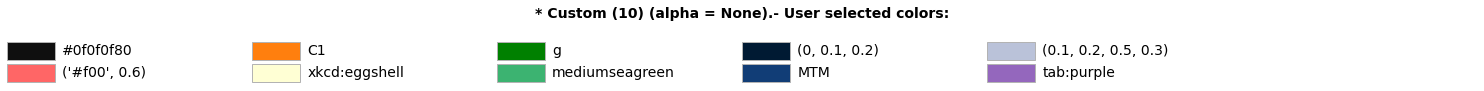

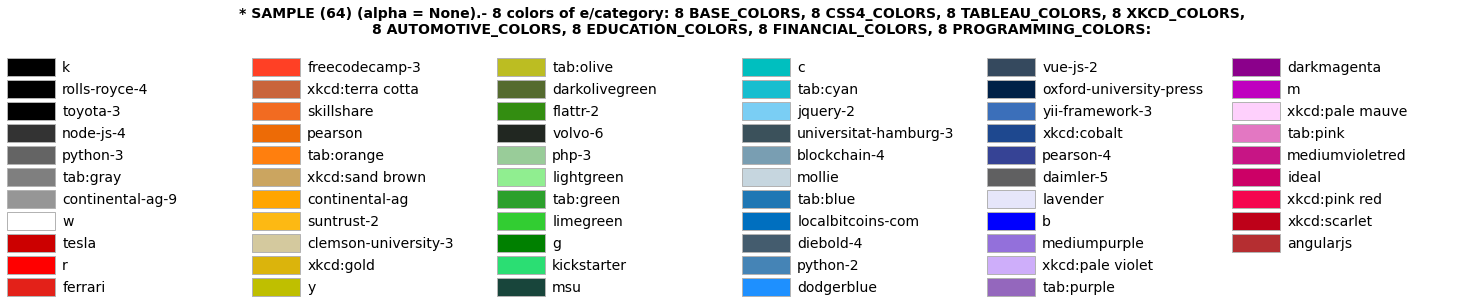

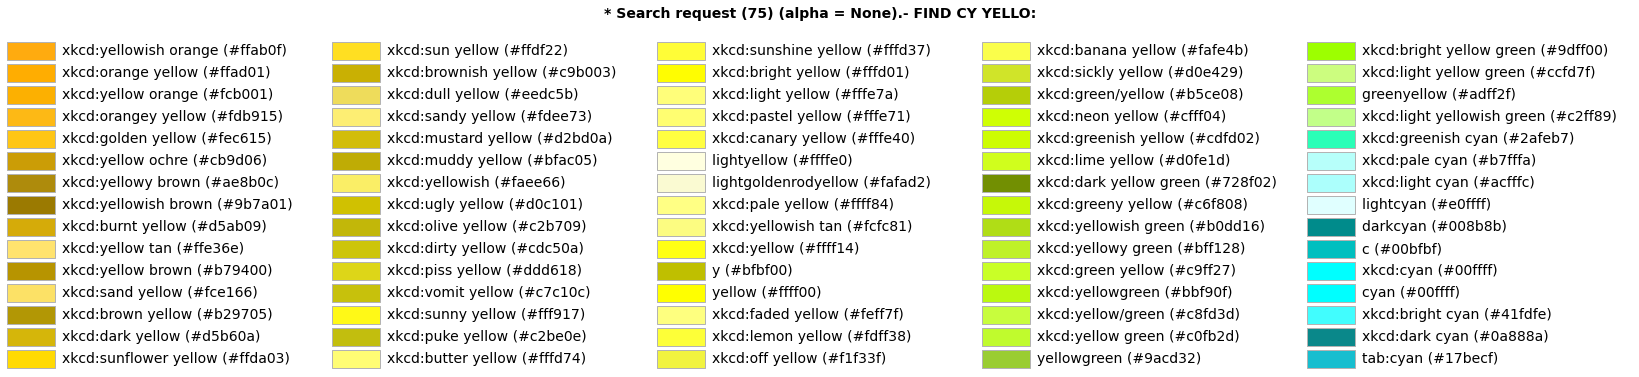

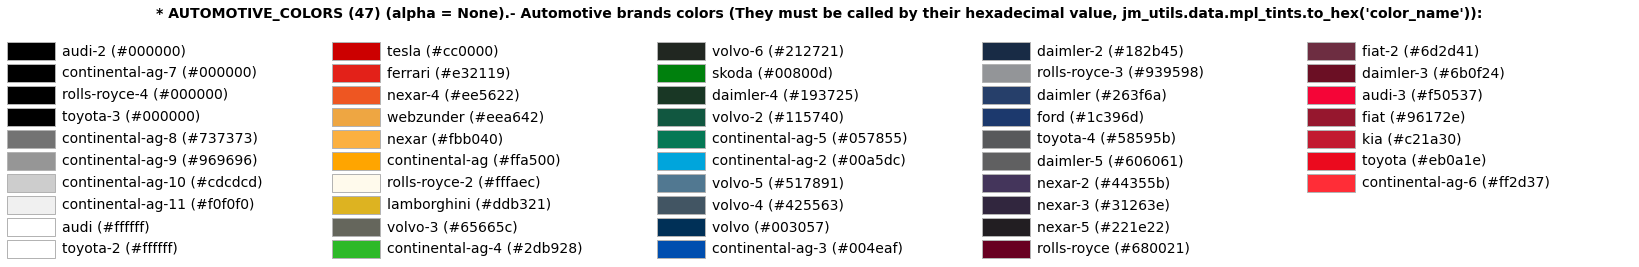

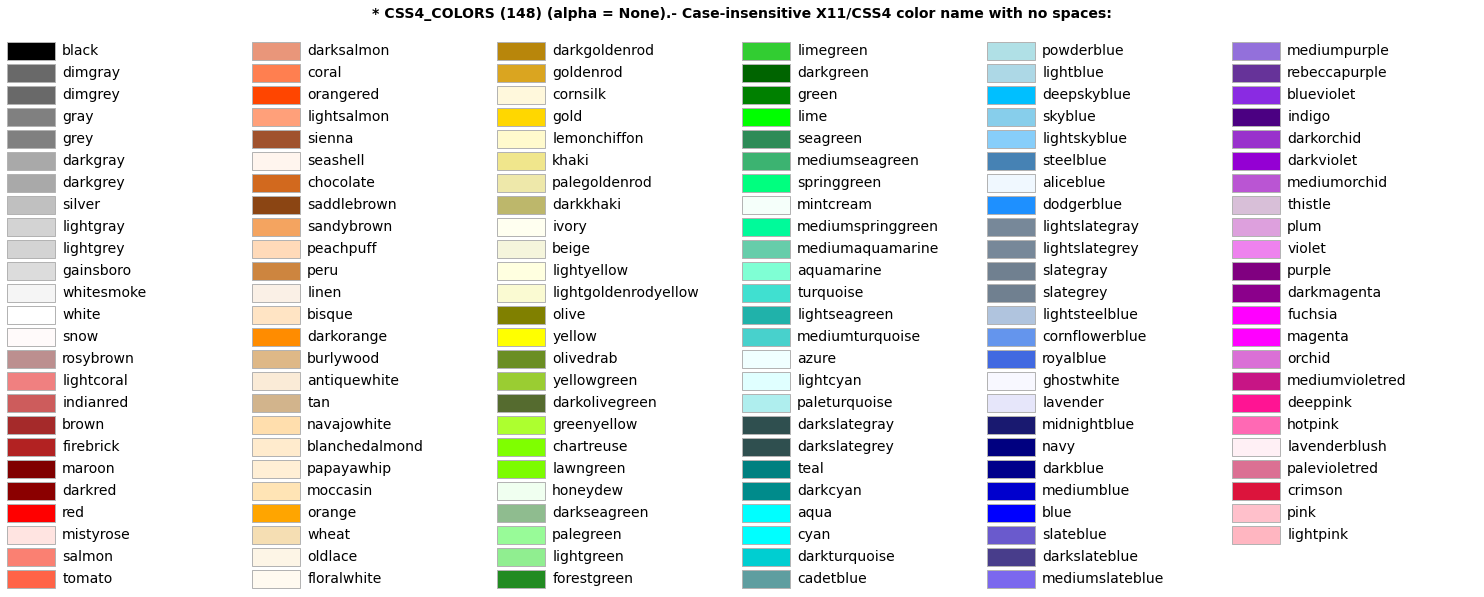

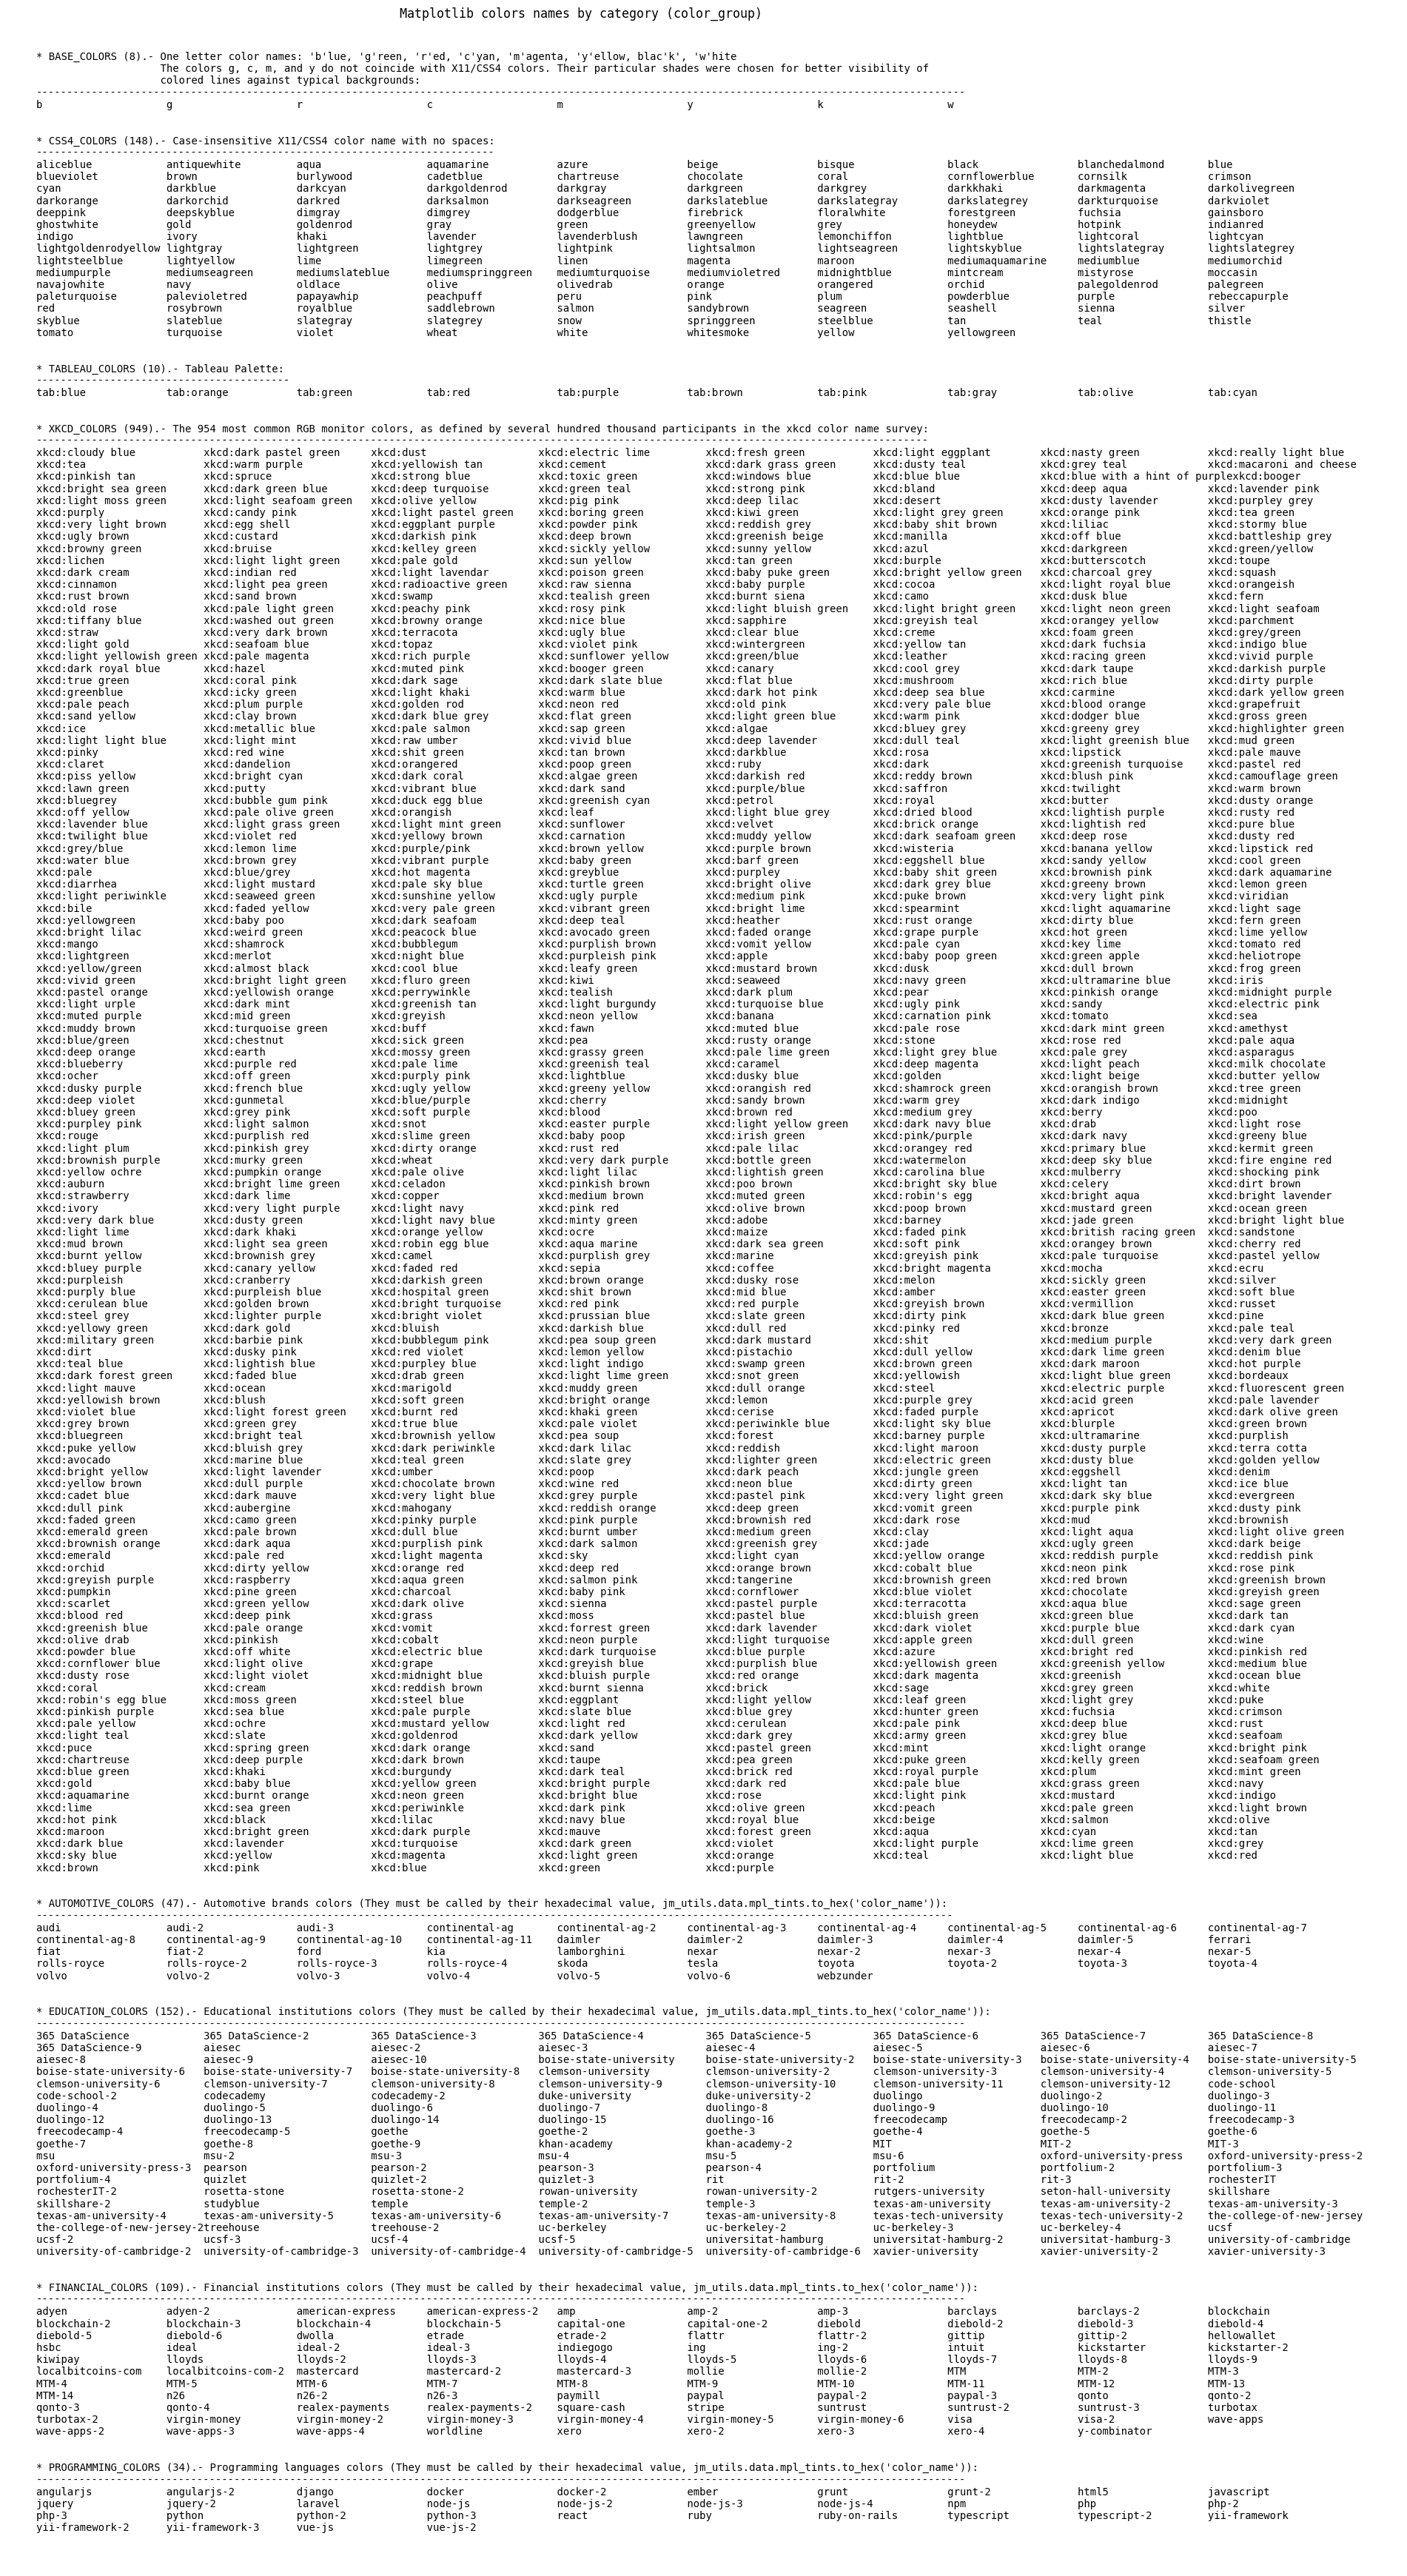

In [1]:
## Un par de pruebas
import jm_utils.data.mpl_tints as mtints

lst = ['g', (0.1, 0.2, 0.5, 0.3), 'MTM', (0, 0.1, 0.2), '#0f0f0f80', 'mediumseagreen', 'xkcd:eggshell', 'tab:purple', 'C1', ('#f00', 0.6)]
fig = mtints.plot_colors(lst)
fig = mtints.plot_colors()
fig = mtints.plot_colors('find cy yello', hex_value=True)
fig = mtints.plot_colors('automotive_colors', hex_value=True)
fig = mtints.plot_colors('css4_colors')
fig = mtints.plot_colors('names')

In [2]:
# Standard Libs
from typing import Optional
import random

# Third-Party Libs
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Local Libs
import jm_utils.data.mpl_tints as mtints


## 4. plot_colors() a partir de 'NOMBRES' o list de 'MIX' ok más abajo
- Aclaracipon sobre MIX: mpl acepta colores por nombres por él conocidos, por hex value del color, por rgb, por rgba, por C0 - C1...
- Pero como MIS propio colors NO son conocidos or mpl y no los puedo registar TENGO que directamente usarlos por su valor hex así que tengo que modificar el plot_colors

In [3]:
## Ver final - con docstring y todos los comentarios in ingles by Qwen
def plot_colors(
        color_group: Optional[str | list[str]] = 'SAMPLE',
        alpha: Optional[float | None] = None,
        n_cols: Optional[int] = 6,
        sort_colors: Optional[bool] = True,
        hex_value: Optional[bool] = False
) -> tuple[plt.Figure, plt.Axes]:
    """
    Displays a visual grid of named Matplotlib colors, organized by category or custom list.

    This function creates a figure showing color swatches with their names for a selected group
    of named colors. It supports built-in categories, a representative sample, a full list of
    category names, or a custom list of colors. Colors can be sorted by hue and displayed with
    their hexadecimal values.

    Parameters:
        color_group (str or list[str], optional): Specifies which colors to display.
            - If str: one of the built-in groups (e.g., 'CSS4_COLORS', 'TABLEAU_COLORS')
              or special options:
              - 'SAMPLE': Shows a selection from all main categories.
              - 'NAMES': Displays a text list of all available color names by category.
              - 'FIND <term1> <term2> ...': Searches for colors containing the terms.
            - If list: A custom list of color names or hex codes to display.
            Case is insensitive for string inputs. Default is 'SAMPLE'.

        alpha (float or None, optional): Transparency level for the color swatches.
            If None, the color's default alpha is used. Default is None.

        n_cols (int, optional): Number of columns in the color grid. Default is 6.

        sort_colors (bool, optional): If True, sorts colors by hue, saturation, and value
            for a more visually organized layout. Default is True.

        hex_value (bool, optional): If True, displays the hexadecimal value of each color
            alongside its name. Default is False.

    Returns:
        tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]: A tuple containing:
            - fig: The matplotlib Figure object.
            - ax: The Axes object with the color grid.

    Raises:
        TypeError: If `color_group` is not a string or list of strings.
        ValueError: If `color_group` is a string but not a recognized category or option.

    Notes:
        - Invalid color names are handled gracefully and may appear as 'none'.
        - The layout adapts to the number of colors and columns.
        - Uses `mtints.COLORS_NAMES_BY_GROUP` and `mtints.to_hex` internally.
        - Ideal for exploring, comparing, and selecting named colors for data visualization.

    Example:
        >>> plot_colors('TABLEAU_COLORS')
        # Displays all Tableau colors.

        >>> plot_colors(['red', 'blue', '#00FF00'], hex_value=True)
        # Shows a custom list of colors with their hex values.

        >>> plot_colors('FIND blue green')
        # Searches for and displays colors with 'blue' or 'green' in their names.

        >>> plot_colors()
        # Shows a default sample of colors from various categories.
    """
    
    # Build the dictionary containing the color names sorted by category (dict key)
    colors_by_group_dic = mtints.COLORS_NAMES_BY_GROUP.copy()

    # Add 'SAMPLE' key entry to colors_by_group_dic, value: (Sample of 8 colors of e/category, and a Description)
    list_of_list_of_names = [value[0] for value in colors_by_group_dic.values()]            # Needed as source of data to get a random sample of 4 palettes of e/category
    colors_by_group_dic['SAMPLE'] = (                                                       # Added 'Sample' dict_key
        [color for c_g in list_of_list_of_names for color in random.sample(c_g, k=8)],      # A random sample of 8 of e/category
        """8 colors of e/category: 8 BASE_COLORS, 8 CSS4_COLORS, 8 TABLEAU_COLORS, 8 XKCD_COLORS,
        8 AUTOMOTIVE_COLORS, 8 EDUCATION_COLORS, 8 FINANCIAL_COLORS, 8 PROGRAMMING_COLORS""")

    # First internal aux. funct. _plot_dic(): generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (color_list, description) in dic.items():
            if group_name == 'SAMPLE':          # Sample list is not showed
                continue
            sp, ncols = 21, 10                  # sp: space between color names, n_cols: number of columns
            if group_name == 'XKCD_COLORS' or group_name == 'EDUCATION_COLORS':
                sp, ncols = 27, 8               # Greater space between color names and less columns
                
            all_text += f"* {group_name} ({len(color_list)}).- {description}:\n"    # Category label and description

            # Dashed subline construction
            leng_ln = len(group_name) + len(description) + 12
            n_dashes = leng_ln if leng_ln < 151 else 150
            all_text += '-' * n_dashes + "\n"

            # Formatted with f-strings
            for i, color in enumerate(color_list):
                all_text += f"{color:<{sp}}"
                if (i + 1) % ncols == 0:
                    all_text += '\n' if color != color_list[-1] else ''
            all_text += '\n\n\n'

        # Build the Figure showing all text
        fig, ax = plt.subplots(figsize=(20, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colors names by category (color_group)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.46, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig, ax

    # 2nd internal aux. funct. _search_request(): build a color_grp_names_lst based on colors requested to find
    def _get_the_required_search(search):

        # Build a big list (most_colors) w/all colors, where we we'll search (except BASE_COLORS, those will be allocated en a dict)
        base_colors_lst = colors_by_group_dic['BASE_COLORS'][0]
        most_colors_lst = list(mtints.get_named_colors_mapping(include_mcolors=True).keys())

        base_colors_fullname_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
        base_colors_dic = dict(zip(base_colors_fullname_lst, base_colors_lst))         # dict(zip(keys, values)) {blue: b, green: g, ..., whithe: w}

        # Begin the search in the base_colors_dic and in the most_color_lst of all colors listed in the search: 'find col1 col2 col3...'
        searched_colors_lst = search.split()[1:]        # only the colors (or strings to search for) separating it from the word 'FIND '
        colors_lst_tmp = []                             # We accumulate sublists with the colors found in the different color groups
        for target in searched_colors_lst:
            # Search for the particular case of base colors which are coded in a single letter
            target_in_base_colors_tmp = [base_colors_dic[key] for key in base_colors_dic.keys() if target.lower() in key.lower()]
            colors_lst_tmp.append(target_in_base_colors_tmp.copy())
            # Search for colors one by one in a complete list (except base colors) generating result sublists that are later flattened into found_colors
            filtered_colors = [color for color in most_colors_lst if target.lower() in color.lower()]
            colors_lst_tmp.append(filtered_colors.copy())

        found_colors = [color for sublist in colors_lst_tmp for color in sublist]       # color_grp_names_lst to plot. All colors found in a single list of strings
        if not found_colors:
            return ['none']
        else:
            return found_colors

    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(color_group, str):          
        color_group_key = color_group.strip().upper()               # Remove leading/trailing whitespace and force string to uppercase              
        if color_group_key == 'NAMES':                      
            fig, ax = _show_dic(colors_by_group_dic)
            return fig, ax
        elif color_group_key.startswith('FIND '):                   # To search color or colors between all colors names
            color_grp_names_lst = _get_the_required_search(color_group_key)   
            color_group_desc = color_group_key
            color_group_key = 'Search request'
        elif color_group_key not in colors_by_group_dic.keys():               
            raise ValueError(f"Invalid value for 'palette_group': {repr(color_group)}. Expected one of:" 
                             "BASE_COLORS', 'CSS4_COLORS', 'TABLEAU_COLORS', 'XKCD_COLORS', 'AUTOMOTIVE_COLORS', 'EDUCATION_COLORS',"
                             "'FINANCIAL_COLORS', 'PROGRAMMING_COLORS', 'SAMPLE' (default), 'NAMES'.")
        else:                                                       # The linear case to invoke the native color dictionaries 
            # Get the color_grp_names_lst and color_group_desc of the selected color category (group) - color_group_key
            color_grp_names_lst, color_group_desc = colors_by_group_dic[color_group_key]
                
    elif isinstance(color_group, list):             # The case of an ad-hoc list of colors   
        color_group_key = 'Custom'                  # Only for title, not a new entry to the dictionary
        color_grp_names_lst = color_group           # The list of entered palettes to be shown
        color_group_desc = 'User selected colors'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(color_group)}. Expected one of: 'str' or 'list'.")
    
    # Sort colors by hue (tone), saturation, value and name (if sort_colors param is True). Reorder color_list 
    if sort_colors is True:                       
        color_grp_names_lst = sorted(color_grp_names_lst, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(mtints.to_hex(c)))))

    # Build the fig. with colors and colors names of the selected group: color_group_key: (color_grp_names_lst, color_group_desc)
    cell_width = 245                                    # Default cell width
    fontsize = 14                                       # Default fontsize for title and color names
    if hex_value is True:
        cell_width = 325                                # Expanded color spacing to accommodate text
        n_cols -= 1                                     # Reduce the number of columns to fit longer text
    cell_height, swatch_width, margin = 22, 48, 12

    nrows = np.ceil(len(color_grp_names_lst) / n_cols)

    width = cell_width * n_cols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,(width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * n_cols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(f"* {color_group_key} ({len(color_grp_names_lst)}) (alpha = {alpha}).- {color_group_desc}:\n",
                 fontsize=fontsize, fontweight='bold')

    for i, color in enumerate(color_grp_names_lst):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        # I'll use the hex_value to plot the color: keep alpha for rgba and (col, alpha) color formats
        keep_alpha = True if isinstance(color, (tuple, list)) and len(color) == 4 or len(color) == 2 else False   

        color_hex = mtints.to_hex(color, keep_alpha=keep_alpha)     # Get hex_value of color                                
        if isinstance(color, str):                                  # But if color is a native hex_color do NOT convert and reset color_hex w/native hex_color value
            if color.startswith('#') and len(color[1:]) in (3, 6, 8) and all(c in '1234567890ABCDabcd' for c in color[1:]):
                color_hex = color                                   # Retain the original hex_value to be independent of the output of .to_hex()

        color_label = color if hex_value is False else f"{color} ({color_hex})"
        
        ax.text(text_pos_x, y, color_label, fontsize=fontsize, ha='left', va='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=color_hex, edgecolor='0.7', alpha=alpha)
        )

    return fig, ax

In [4]:
# Esta sería una manera: trabajar la función plot_colors() con dic de dic y trabajar los nombres y valores por separado.
colors_by_group_dic = mtints.COLORS_NAMES_BY_GROUP
colors_by_group_dic

{'BASE_COLORS': (['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],
  "One letter color names: 'b'lue, 'g'reen, 'r'ed, 'c'yan, 'm'agenta, 'y'ellow, blac'k', 'w'hite\n                    The colors g, c, m, and y do not coincide with X11/CSS4 colors. Their particular shades were chosen for better visibility of \n                    colored lines against typical backgrounds"),
 'CSS4_COLORS': (['aliceblue',
   'antiquewhite',
   'aqua',
   'aquamarine',
   'azure',
   'beige',
   'bisque',
   'black',
   'blanchedalmond',
   'blue',
   'blueviolet',
   'brown',
   'burlywood',
   'cadetblue',
   'chartreuse',
   'chocolate',
   'coral',
   'cornflowerblue',
   'cornsilk',
   'crimson',
   'cyan',
   'darkblue',
   'darkcyan',
   'darkgoldenrod',
   'darkgray',
   'darkgreen',
   'darkgrey',
   'darkkhaki',
   'darkmagenta',
   'darkolivegreen',
   'darkorange',
   'darkorchid',
   'darkred',
   'darksalmon',
   'darkseagreen',
   'darkslateblue',
   'darkslategray',
   'darkslategrey',
   'darktu

(<Figure size 200x200 with 1 Axes>, <Axes: >)

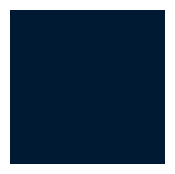

In [5]:
## Vamos a intentar primero trabajar con solo los nombres de los colores utilizando la función que ya hice to_hex()

mtints.to_hex((0, 0.1, 0.2))  # Funciona 
mtints.plot_a_color((0, 0.1, 0.2))

In [6]:
# lst = [1, 2, 3]
lst = []
for i in lst:
    print(i)

In [7]:
# NEW-VER vamos a trabajar con los hexvalues a partir del nombre -> Perfecto con mtints.to_hex() resuelvo tuito
def plot_colors(
        color_group: Optional[str | list[str]] = 'SAMPLE',
        alpha: Optional[float | None] = None,
        n_cols: Optional[int] = 6,
        sort_colors: Optional[bool] = True,
        hex_value: Optional[bool] = False
) -> tuple[plt.Figure, plt.Axes]:
    
    # Build the dictionary containing the color names sorted by category (dict key)
    colors_by_group_dic = mtints.COLORS_NAMES_BY_GROUP.copy()

    # Add 'SAMPLE' key entry to colors_by_group_dic, value: (Sample of 8 colors of e/category, and a Description)
    list_of_list_of_names = [value[0] for value in colors_by_group_dic.values()]            # Needed as source of data to get a random sample of 4 palettes of e/category
    colors_by_group_dic['SAMPLE'] = (                                                       # Added 'Sample' dict_key
        [color for c_g in list_of_list_of_names for color in random.sample(c_g, k=8)],      # A random sample of 8 of e/category
        """8 colors of e/category: 8 BASE_COLORS, 8 CSS4_COLORS, 8 TABLEAU_COLORS, 8 XKCD_COLORS,
        8 AUTOMOTIVE_COLORS, 8 EDUCATION_COLORS, 8 FINANCIAL_COLORS, 8 PROGRAMMING_COLORS""")

    # First internal aux. funct. _plot_dic(): generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (color_list, description) in dic.items():
            if group_name == 'SAMPLE':          # Sample list is not showed
                continue
            sp, ncols = 21, 10                  # sp: space between color names, n_cols: number of columns
            if group_name == 'XKCD_COLORS' or group_name == 'EDUCATION_COLORS':
                sp, ncols = 27, 8               # Grater space between color names and less columns
                
            all_text += f"* {group_name} ({len(color_list)}).- {description}:\n"    # Category label and description

            # Dashed subline construction
            leng_ln = len(group_name) + len(description) + 12
            n_dashes = leng_ln if leng_ln < 151 else 150
            all_text += '-' * n_dashes + "\n"

            # Formeatado con f-strings
            for i, color in enumerate(color_list):
                all_text += f"{color:<{sp}}"
                if (i + 1) % ncols == 0:
                    all_text += '\n' if color != color_list[-1] else ''
            all_text += '\n\n\n'

        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(20, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colors names by category (color_group)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.46, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig, ax

    # 2nd internal aux. funct. _search_request(): build a color_grp_names_lst based on colors requested to find
    def _get_the_required_search(search):

        # Build a big list (most_colors) w/all colors, where we we'll search (except BASE_COLORS, those will be allocated en a dict)
        base_colors_lst = colors_by_group_dic['BASE_COLORS'][0]
        most_colors_lst = list(mtints.get_named_colors_mapping(include_mcolors=True).keys())

        base_colors_fullname_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
        base_colors_dic = dict(zip(base_colors_fullname_lst, base_colors_lst))         # dict(zip(keys, values)) {blue: b, green: g, ..., whithe: w}

        # Beging the search in the base_colors_dic and in the most_color_lst of all colors listed in the search: 'find col1 col2 col3...'
        searched_colors_lst = search.split()[1:]        # only the colors (or strings to search for) separating it from the word 'FIND '
        colors_lst_tmp = []                             # Vamos acumulando sublistas con los colores encontrados en los distintos grupos de colores
        for target in searched_colors_lst:
            # Busqueda para el caso particular de los base colors que están codificado en una sola letra
            target_in_base_colors_tmp = [base_colors_dic[key] for key in base_colors_dic.keys() if target.lower() in key.lower()]
            colors_lst_tmp.append(target_in_base_colors_tmp.copy())
            # Busqueda de los colores de a uno en un listado completo (menos los base colors) generando sublistas de resultados que luego se aplanan en found_colors
            filtered_colors = [color for color in most_colors_lst if target.lower() in color.lower()]
            colors_lst_tmp.append(filtered_colors.copy())

        found_colors = [color for sublist in colors_lst_tmp for color in sublist]       # color_grp_names_lst to plot. All colors found in a single list of strings
        if not found_colors:
            return ['none']
        else:
            return found_colors

    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(color_group, str):          
        color_group_key = color_group.strip().upper()               # Eliminamos nulos de los extremos y forzamos todo el string a mayúsculas              
        if color_group_key == 'NAMES':                      
            fig, ax = _show_dic(colors_by_group_dic)
            return fig, ax
        elif color_group_key.startswith('FIND '):                   # To search color or colors between all colors names
            color_grp_names_lst = _get_the_required_search(color_group_key)   
            color_group_desc = color_group_key
            color_group_key = 'Search request'
        elif color_group_key not in colors_by_group_dic.keys():               
            raise ValueError(f"Invalid value for 'palette_group': {repr(color_group)}. Expected one of:" 
                             "BASE_COLORS', 'CSS4_COLORS', 'TABLEAU_COLORS', 'XKCD_COLORS', 'AUTOMOTIVE_COLORS', 'EDUCATION_COLORS',"
                             "'FINANCIAL_COLORS', 'PROGRAMMING_COLORS', 'SAMPLE' (default), 'NAMES'.")
        else:                                                       # El caso lineal the invocar los diccionarios de colores nativos 
            # Get the color_grp_names_lst and color_group_desc of the selected color category (group) - color_group_key
            color_grp_names_lst, color_group_desc = colors_by_group_dic[color_group_key]
                
    elif isinstance(color_group, list):             # El caso de una lista ad-hoc de colores   
        color_group_key = 'Custom'                  # Only for title, no a new entry to de dictionary
        color_grp_names_lst = color_group           # The list of entered palettes to be shown
        color_group_desc = 'User selected colors'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(color_group)}. Expected one of: 'str' or 'list'.")
    
    # Sort colors by hue (tono), saturation, value and name (if sort_colors param id True). Reorder color_list 
    if sort_colors is True:                       
        color_grp_names_lst = sorted(color_grp_names_lst, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(mtints.to_hex(c)))))

    # Build the fig. with colors and colors names of the selected group: color_group_key: (color_grp_names_lst, color_group_desc)
    cell_width = 245                                    # Default cell width
    fontsize = 14                                       # Default fontsize for title and color names
    if hex_value is True:
        cell_width = 325                                # Expanded color spacing to accommodate text
        n_cols -= 1                                     # Reducimos el número de columnas para ubicar texto más largo
    cell_height, swatch_width, margin = 22, 48, 12

    nrows = np.ceil(len(color_grp_names_lst) / n_cols)

    width = cell_width * n_cols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,(width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * n_cols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(f"* {color_group_key} ({len(color_grp_names_lst)}) (alpha = {alpha}).- {color_group_desc}:\n",
                 fontsize=fontsize, fontweight='bold')

    for i, color in enumerate(color_grp_names_lst):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        # I'll use the  hex_value to plot the color: keep alpha for rgba and (col, alpha) color formats
        keep_alpha = True if isinstance(color, (tuple, list)) and len(color) == 4 or len(color) == 2 else False   

        color_hex = mtints.to_hex(color, keep_alpha=keep_alpha)     # Get hex_value of color                                
        if isinstance(color, str):                                  # But if color is a native hex_color do NOT convert and reset color_hex w/native hex_color value
            if color.startswith('#') and len(color[1:]) in (3, 6, 8) and all(c in '1234567890ABCDabcd' for c in color[1:]):
                color_hex = color                                   # Retain the original hex_value to be independent of the output of .to_hex()

        color_label = color if hex_value is False else f"{color} ({color_hex})"
        
        ax.text(text_pos_x, y, color_label, fontsize=fontsize, ha='left', va='center')    #, fontfamily='monospace')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=color_hex, edgecolor='0.7', alpha=alpha)
        )

    return fig, ax

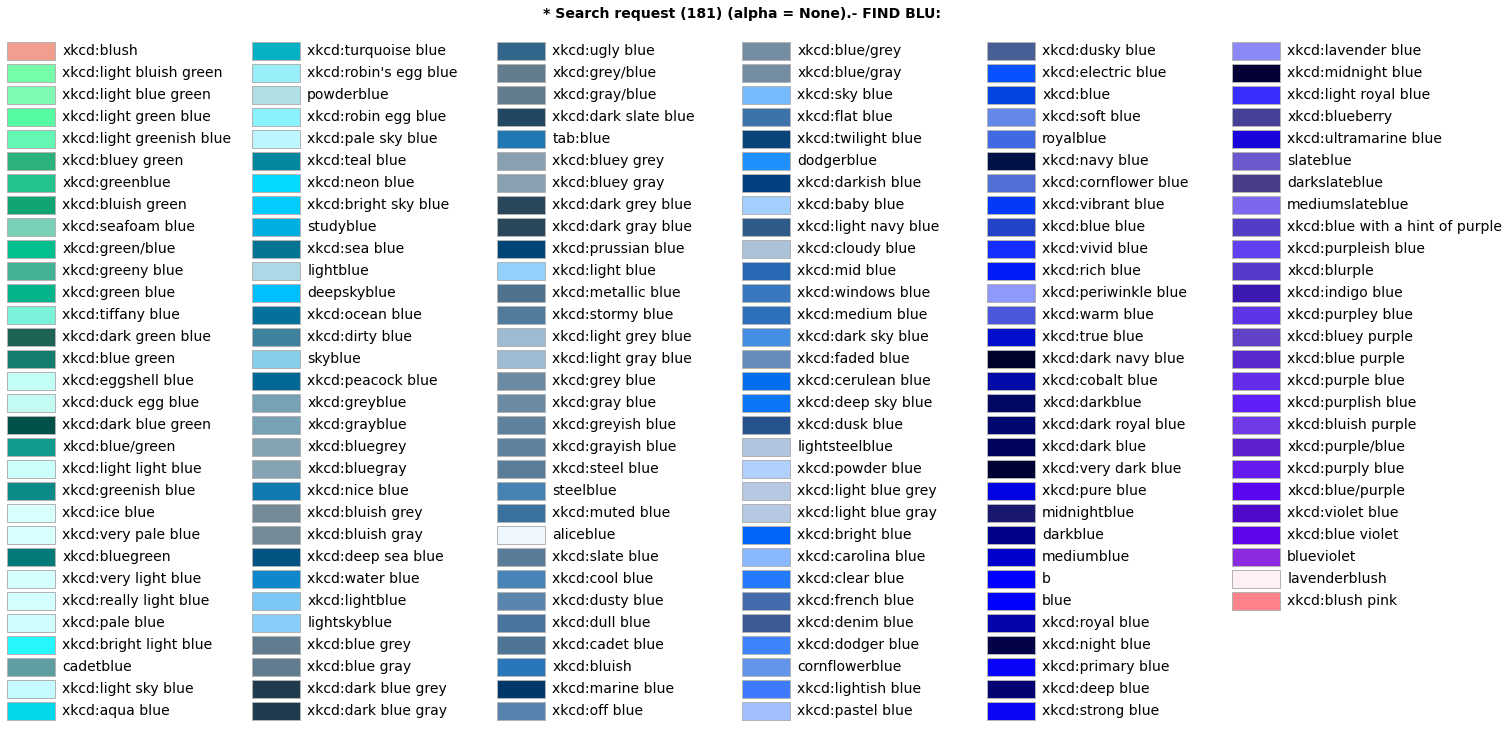

In [8]:
fig = plot_colors('find blu')

In [9]:
# Build the dictionary containing the color names sorted by category (dict key)
colors_by_group_dic = mtints.COLORS_NAMES_BY_GROUP.copy()
base_colors_lst = colors_by_group_dic['BASE_COLORS'][0]
base_colors_fullname_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
base_colors_dic = dict(zip(base_colors_fullname_lst, base_colors_lst))         # dict(zip(keys, values)) {blue: b, green: g, ..., whithe: w}

searched_colors_lst = ['cy', 'bl']       # only the colors (or strings to search for) separating it from the word 'FIND '
colors_lst_tmp = []
# target_in_base_colors = []
for target in searched_colors_lst:
    # target_in_base_colors_tmp = [color for color in base_colors_fullname_lst if target.lower() in color.lower()]
    target_in_base_colors_tmp = [base_colors_dic[key] for key in base_colors_dic.keys() if target.lower() in key.lower()]
    colors_lst_tmp.append(target_in_base_colors_tmp)
    # for color in target_in_base_colors:
    #     colors_lst_tmp.append(target.lower())
# colors_lst_tmp
# target_in_base_colors_tmp
colors_lst_tmp

[['c'], ['b', 'k']]

In [10]:
# mcolors.to_hex((0.1, 0.2, 0.5, 0.3), keep_alpha=True)
# mcolors.to_hex('#1a33804c', keep_alpha=True)
# mcolors.to_hex((0.1, 0.2, 0.5), keep_alpha=True)
mcolors.to_hex(('#f00', 0.2), keep_alpha=True)


'#ff000033'

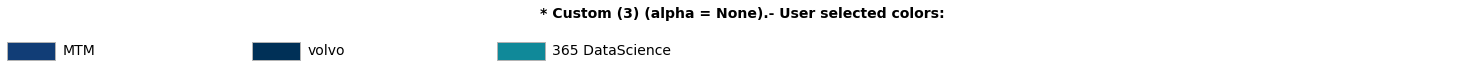

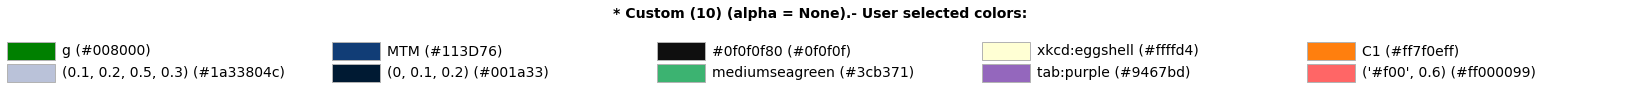

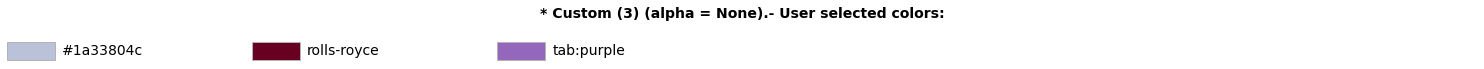

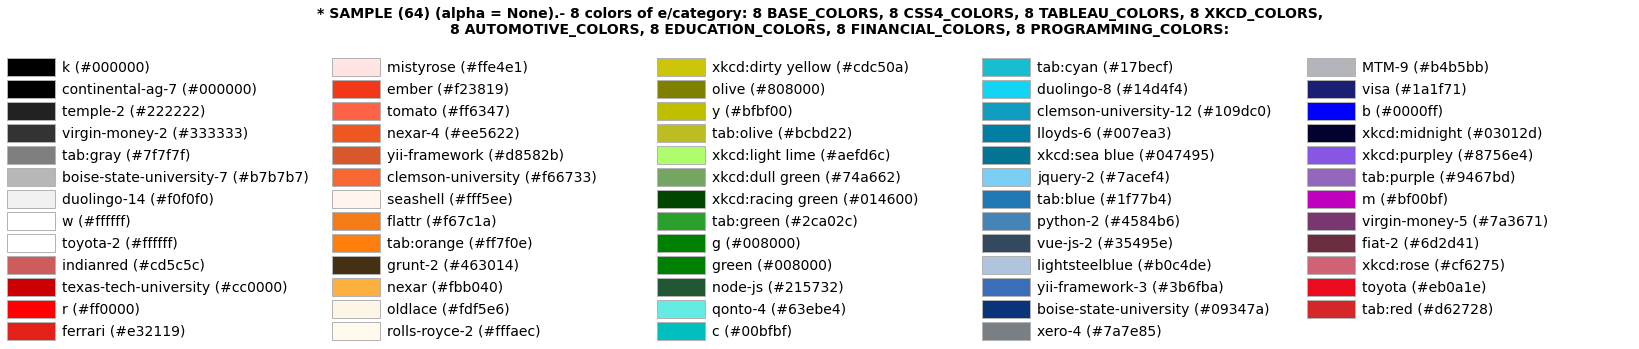

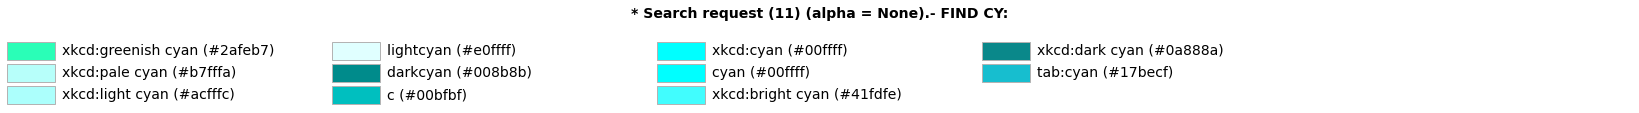

In [11]:
lst = ['g', (0.1, 0.2, 0.5, 0.3), 'MTM', (0, 0.1, 0.2), '#0f0f0f80', 'mediumseagreen', 'xkcd:eggshell', 'tab:purple', 'C1', ('#f00', 0.6)]
# ls1 = ['#008000', '#1a3380', '#113D76', '#001a33', '#0f0f0f80', '#3cb371', '#ffffd4', '#9467bd', '#ff7f0e', '#ff0000']
ls1 = ['#1a33804c', 'rolls-royce', 'tab:purple']
# lst = ['g', (0.1, 0.2, 0.5, 0.3), (0, 0.1, 0.2), '#0f0f0f80', 'mediumseagreen', 'xkcd:eggshell', 'tab:purple', 'C1', ('#f00', 0.9)]
# fig = plot_colors('find mtm volvo 365', sort_colors=False, hex_value=False, n_cols=6)
fig = plot_colors(['MTM', 'volvo', '365 DataScience'], sort_colors=False, hex_value=False)
fig = plot_colors(lst, sort_colors=False, hex_value=True, alpha=None)
fig = plot_colors(ls1, sort_colors=False, hex_value=False)
# mtints.to_hex('volvo')
mcolors.cnames == mcolors.CSS4_COLORS
# len(mcolors.cnames)
# len(mcolors.get_named_colors_mapping())
# fig = plot_colors(list(mcolors.cnames.keys()))
# fig = plot_colors('financial_colors', hex_value=True, alpha=None, sort_colors=False)
fig = plot_colors(hex_value=True)
fig = plot_colors('find cy', hex_value=True)



'#1a3380'

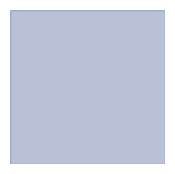

In [12]:
rgba = (0.1, 0.2, 0.5, 0.3)
rgba_lst = [0.1, 0.2, 0.5, 0.3]
mtints.plot_a_color(rgba_lst)
# mtints.plot_a_color('#1a3380')
mcolors.to_hex(rgba_lst, keep_alpha=None)

In [13]:
stop()

NameError: name 'stop' is not defined

In [ ]:
# ANDA full con NAMEs y lst
def plot_colors(
        color_group: Optional[str | list[str]] = 'SAMPLE',
        alpha: Optional[float | None] = None,
        n_cols: Optional[int] = 6,
        sort_colors: Optional[bool] = True,
        hex_value: Optional[bool] = False
) -> tuple[plt.Figure, plt.Axes]:
    
    # Build the dictionary containing the color names sorted by category (dict key)
    colors_by_group_dic = mpl_tints.COLORS_NAMES_BY_GROUP

    # Add 'SAMPLE' key entry to colors_by_group_dic, value: (Sample of 8 colors of e/category, and a Description)
    list_of_pltt_lists = [value[0] for value in colors_by_group_dic.values()]              # Needed as source of data to get a random sample of 4 palettes of e/category
    colors_by_group_dic['SAMPLE'] = (                                                      # Added 'Sample' dict_key
        [color for c_g in list_of_pltt_lists for color in random.sample(c_g, k=8)],           # A random sample of 8 of e/category
        "8 colors of e/category: 8 BASE_COLORS, 8 CSS4_COLORS, 8 TABLEAU_COLORS, 8 XKCD_COLORS")

    # First internal aux. funct. _plot_dic(): generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (color_list, description) in dic.items():
            if group_name == 'SAMPLE':          # Sample list is not showed
                continue
            sp, ncols = 21, 10                  # sp: space between color names, n_cols: number of columns
            if group_name == 'XKCD_COLORS':
                sp, ncols = 27, 8               # Grater space between color names and less columns
                
            all_text += f"* {group_name} ({len(color_list)}).- {description}:\n"    # Category label and description

            # Dashed subline construction
            leng_ln = len(group_name) + len(description) + 12
            n_dashes = leng_ln if leng_ln < 151 else 150
            all_text += '-' * n_dashes + "\n"

            # Formeatado con f-strings
            for i, color in enumerate(color_list):
                all_text += f"{color:<{sp}}"
                if (i + 1) % ncols == 0:
                    all_text += '\n' if color != color_list[-1] else ''
            all_text += '\n\n\n'

        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(20, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colors names by category (color_group)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.46, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig, ax

    # 2nd internal aux. funct. _search_request(): build a color_grp_names_lst based on colors requested to find
    def _get_the_required_search(search):

        # Build a big list (most_colors) w/all colors, where we we'll search (except BASE_COLORS, those will be allocated en a dict)
        dic = colors_by_group_dic
        base_colors_lst = dic['BASE_COLORS'][0]
        most_colors_lst = dic['CSS4_COLORS'][0] + dic['TABLEAU_COLORS'][0] + dic['XKCD_COLORS'][0]
        
        base_colors_fullname_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
        base_colors_dic = dict(zip(base_colors_fullname_lst, base_colors_lst))         # dict(zip(keys, values))

        # Beging the search in the most_color_lst and the base_colors_dic
        searched_colors_lst = search.split()[1:]        # only the colors (or strings to search for) separating it from the word 'FIND '
        # found_colors = [color for color in searched_colors_lst if color.lower() in most_colors_lst] # FUTURE
        colors_lst_tmp = []
        for target in searched_colors_lst:
            try:                                        # Cause key could not exist in base_colors_dic                                
                colors_lst_tmp.append(base_colors_dic[target.lower()])
            except KeyError:
                pass
            filtered_colors = list(filter(lambda color: target.lower() in color.lower(), most_colors_lst))
            colors_lst_tmp.append(filtered_colors.copy())

        found_colors = [color for sublist in colors_lst_tmp for color in sublist]              # color_grp_names_lst to plot. All colors found in a single list of strings
        if not found_colors:
            return ['none']
        else:
            return found_colors

    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(color_group, str):          
        color_group_key = color_group.strip().upper()
        if color_group_key == 'NAMES':
            fig, ax = _show_dic(colors_by_group_dic)
            return fig, ax
        elif color_group_key.startswith('FIND '):                    # Acá vamos a hacer un jorgitomonteada
            color_grp_names_lst = _get_the_required_search(color_group_key)   
            color_group_desc = color_group_key
            color_group_key = 'Search request'
        elif color_group_key not in colors_by_group_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(color_group)}. Expected one of:" 
                             "BASE_COLORS', 'CSS4_COLORS', 'TABLEAU_COLORS', 'XKCD_COLORS', 'SAMPLE' (default), 'NAMES'.")
        else:
            # Get the color_grp_names_lst and color_group_desc of the selected color category (group) - color_group_key
            color_grp_names_lst, color_group_desc = colors_by_group_dic[color_group_key]
                
    elif isinstance(color_group, list):   
        color_group_key = 'Custom'              # Only for title, no a new entry to de dictionary
        color_grp_names_lst = color_group      # The list of entered palettes to be shown
        color_group_desc = 'User selected colors'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(color_group)}. Expected one of: 'str' or 'list'.")
    
    # Sort colors by hue (tono), saturation, value and name (if sort_colors param id True). Reorder color_list 
    if sort_colors is True:                       
        color_grp_names_lst = sorted(color_grp_names_lst, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))

    # Buil the fig. with colors and colors names of the selected group: color_group_key: (color_grp_names_lst, color_group_desc)
    cell_width, cell_height, swatch_width, margin = 212, 22, 48, 12

    nrows = np.ceil(len(color_grp_names_lst) / n_cols)

    width = cell_width * n_cols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * n_cols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(f"* {color_group_key} ({len(color_grp_names_lst)}).- {color_group_desc}:\n",
                 fontsize=14, fontweight='bold')

    for i, color_name in enumerate(color_grp_names_lst):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        color_label = color_name if hex_value is False else mcolors.to_hex(color_name)
        ax.text(text_pos_x, y, color_label, fontsize=14, ha='left', va='center')

        ax.add_patch(
            # Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=(color_name, alpha), edgecolor='0.7')
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=color_name, edgecolor='0.7', alpha=alpha)
        )

    return fig, ax

In [ ]:
fig, ax = plot_colors('find red')

In [ ]:
# 3. Veamos ahora la función mcolors.get_named_colors_mapping()
dict(sorted(mcolors.get_named_colors_mapping().items(), key=lambda x: x[0].lower()))
dict(sorted(mpl_tints.get_named_colors_mapping().items(), key=lambda x: x[0].lower()))
# sorted(mcolors.get_named_colors_mapping().items(), key=lambda x: x[0])


In [ ]:
# 1. Veamos ahora los diccionarios de colores
print(mpl_tints.AUTOMOTIVE_COLORS)
print(mcolors.TABLEAU_COLORS)

In [ ]:
# 2. Hicimos una funcioncita plot_color() muy simple para probar los colores propios
mpl_tints.plot_a_color("audi-3")
mpl_tints.get_hex_color("audi-3")


In [ ]:
mcolors.BASE_COLORS['k']

In [ ]:
mcolors.BASE_COLORS['g']
hg = mcolors.rgb2hex('g')
print(hg)

# mpl_tints.plot_a_color_name('g')
# mpl_tints.plot_a_color_name(hg)

fig, axs = plt.subplots(1, 5, figsize=(14, 2))
mpl_tints.ax_a_color(axs[0], 'g')
mpl_tints.ax_a_color(axs[1], hg)
mpl_tints.ax_a_color(axs[2], '365 DataScience')
mpl_tints.ax_a_color(axs[3], 'python')
# mpl_tints.ax_a_color_name(axs[4], (0.75, 0.75, 0))
mpl_tints.ax_a_color(axs[4], (0, 0, 0))
# mpl_tints.ax_a_color_name(axs[4], 'y')



In [ ]:
## probemos suma de dicts
d1 = {1: 10, 2: 20, 3: 30}
d2 = {2: 45, 5: 55, 6: 65}
d3 = {**d1, **d2}           # Ojo deja un solo valor, EL ULTIMO
d3

# d3 = {k: d1.get(k, 0) + d2.get(k, 0) for k in set(d1) | set(d2)}
# d3

## Tengo tanto lío que voy a tenner que ir escribiendo con fecha.
- 17/8/25: Se abrió todo un mundo nuevo con el tema de registrar: (claude)
  - Registrar paletas (ya hice), pero tengo que probar a ver como se ver el tema del N (n_bins) - DONE (n_bins continuos, para los quelitatives N = len(colors))
  - Registrar el reversed de cada paleta - DONE (hay al menos dos formas de hacerlo, lo hice con mayor utilización del objeto cmap_custom.reversed() que tiene default name '_r)
  - Registrar COLORES?, como existen los BASE_COLORS y los CSS4_COLORS, etc. , registrar mi propio grupo de colores (no creo y por ahí no es tan importante)
  - PERO todo esto para crear grupitos de dos o tres (hasta 4 podría ser) COLORES (paletitas) para hcer graficos tipo Pareto o Pie de pocos wedges u otros con 3, 4 o 5 colores asociados
  - Y TAMBIEN, para que en el PIE chart, por ej, NO saque los extremos de las paletas Qualitatives.. , o solo saque en los secuenciales ?
  - DEBERÏA hacer ejemplos de uso de las paletas, o sea funciones que muestren charts donde se puedan ver el uso de los diferentes grupos de paletas y de paso probar distintas paletas del mismo grupo en un dato gráfico (algo asi como hacer un figure 2 ,2 y cada chart con una paleta distinta.
  - A seguir el lunes con la registración, y terminar el plot_colors (le falta el tema de pasar una lista con los colors que quiero ver) - revisar si tengo ok la última version del plot_palettes..
- 17/8/25: ya registre mis cmaps usando register_a_cmap()
- 16/8/25: voy a hacer algo más en colors, obtener combinaciones de dos y tres colores para presentaciones muy profesionales. MTM por ej puedo azul, naranja, gris.
        Pero antes voy a dejar firme las Last Vers. de plot_pltts y plot_colors
- 16/8/25: Ya tengo listo el plot_mpl_palettes() y el plot_mpl_colors() y también los dicts así que me parece quev oy a dejar acá este tema 
        sin hacer nada de diferenciar ax de figure o de estudiar el tema de subfigures e impacatar todo lo que tengo en mpl_tints para seguir
